In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

In [2]:
digits = load_digits()
digits.data.shape
pca = PCA(n_components=0.99, svd_solver='full')
digits_pca = pca.fit_transform(digits.data)
digits_pca.shape[1]

41

In [4]:
min_aic = float('inf')
min_aic_n = 0

for n_components in range(50, 250, 10):
    gm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=11)
    
    gm.fit(digits_pca)

    if (gm.aic(digits_pca) < min_aic):
        min_aic = gm.aic(digits_pca)
        min_aic_n = n_components

min_aic_n

180

In [5]:
gm = GaussianMixture(n_components=min_aic_n, covariance_type='full', random_state=11)
gm.fit(digits_pca)
samples, _ = gm.sample(100)
samples[:, 0].mean()

-1.1059140036175215

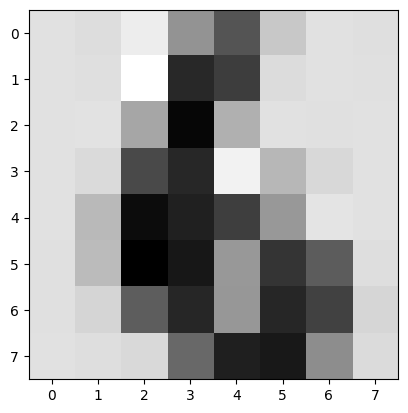

In [6]:
inverse_samples = pca.inverse_transform(samples)
plt.imshow(inverse_samples[16].reshape((8, 8)), cmap='gray_r')